In [6]:
# 간단한 Word2Vec 모델 구현
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [16]:
%matplotlib inline

In [4]:
# 폰트확인
matplotlib.font_manager.get_fontconfig_fonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/padauk/Padauk-bold.ttf',
 '/usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgMono-Oblique.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypewriter-BoldOblique.ttf',
 '/usr/share/fonts/truetype/tlwg/Umpush-BoldOblique.ttf',
 '/usr/share/fonts/truetype/freefont/FreeMono.ttf',
 '/usr/share/fonts/truetype/tlwg/Umpush-LightOblique.ttf',
 '/usr/share/fonts/opentype/stix/STIXVariants-Regular.otf',
 '/usr/share/fonts/truetype/unfonts-core/UnGungseo.ttf',
 '/usr/share/fonts/opentype/stix/STIXSizeFourSym-Regular.otf',
 '/usr/share/fonts/truetype/kacst/KacstTitleL.ttf',
 '/usr/share/fonts/truetype/freefont/FreeSerif.ttf',
 '/usr/share/fonts/opentype/stix-word/STIXMath-Regular.otf',
 '/usr/share/fonts/truetype/tlwg/Norasi-BoldItalic.ttf',
 '/usr/share/fonts/truetype/tlwg/Loma-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/s

In [7]:
# 폰트 설정
font_name = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf").get_name()
matplotlib.rc('font', family=font_name)

In [8]:
# 단어 벡터를 분석해볼 임의의 문장들
sentences = ["나 고양이 좋다",
             "나 강아지 좋다",
             "나 동물 좋다",
             "강아지 고양이 동물",
             "여자친구 고양이 강아지 좋다",
             "고양이 생선 우유 좋다",
             "강아지 생선 싫다 우유 좋다",
             "강아지 고양이 눈 좋다",
             "나 여자친구 좋다",
             "여자친구 나 싫다",
             "여자친구 나 영화 책 음악 좋다",
             "나 게임 만화 애니 좋다",
             "고양이 강아지 싫다",
"강아지 고양이 좋다"]

In [9]:
# 문장을 전부 합친 후 공백으로 단어들을 나누고 고유한 단어들로 리스트를 만듭니다.
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

In [22]:
word_list

['음악',
 '싫다',
 '동물',
 '게임',
 '생선',
 '좋다',
 '만화',
 '애니',
 '눈',
 '강아지',
 '우유',
 '고양이',
 '여자친구',
 '영화',
 '나',
 '책']

In [10]:
# 문자열을 숫자로 분석하기 위한 작업
# 연관 배열 및 단어 리스트에서 단어 참조를 위한 인덱스 배열 생성
word_dict = {w: i for i, w in enumerate(word_list)}
word_index = [word_dict[word] for word in word_list]

In [23]:
word_dict

{'강아지': 9,
 '게임': 3,
 '고양이': 11,
 '나': 14,
 '눈': 8,
 '동물': 2,
 '만화': 6,
 '생선': 4,
 '싫다': 1,
 '애니': 7,
 '여자친구': 12,
 '영화': 13,
 '우유': 10,
 '음악': 0,
 '좋다': 5,
 '책': 15}

In [24]:
word_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [33]:
# 윈도우 사이즈를 1로 하는 skip-gram 모델을 생성
# 예) 나 게임 만화 애니 좋다
#     -> ([나, 만화], 게임), ([게임, 애니], 만화), ([만화, 좋다], 애니)
#     -> (게임, 나), (게임, 만화), (만화, 게임), (만화, 애니), (애니, 만화), (애니, 좋다)
skip_grams = []

for i in range(1, len(word_index) -1):
    # (context, target) : ([target index - 1, target index+1], target)
    target = word_index[i]
    context = [word_index[i-1], word_index[i+1]] # 윈도우 사이즈 역할?? 
    
    print(context)
    # (target, context[0], (target, context[1]))
    for w in context:
        print('w : ', w)
        skip_grams.append([target, w])

[0, 2]
w :  0
w :  2
[1, 3]
w :  1
w :  3
[2, 4]
w :  2
w :  4
[3, 5]
w :  3
w :  5
[4, 6]
w :  4
w :  6
[5, 7]
w :  5
w :  7
[6, 8]
w :  6
w :  8
[7, 9]
w :  7
w :  9
[8, 10]
w :  8
w :  10
[9, 11]
w :  9
w :  11
[10, 12]
w :  10
w :  12
[11, 13]
w :  11
w :  13
[12, 14]
w :  12
w :  14
[13, 15]
w :  13
w :  15


In [31]:
skip_grams

[[1, 0],
 [1, 2],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [4, 5],
 [5, 4],
 [5, 6],
 [6, 5],
 [6, 7],
 [7, 6],
 [7, 8],
 [8, 7],
 [8, 9],
 [9, 8],
 [9, 10],
 [10, 9],
 [10, 11],
 [11, 10],
 [11, 12],
 [12, 11],
 [12, 13],
 [13, 12],
 [13, 14],
 [14, 13],
 [14, 15]]

In [13]:
# skip-gram 데이터에서 무작위로 데이터를 뽑아 입력값과 출력값의 배치 데이터를 생성
def random_batch(data, size):
    random_inputs=[]
    random_labels=[]
    random_index=np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(data[i][0]) # target
        random_labels.append([data[i][1]]) # context word
        
    return random_inputs, random_labels

In [14]:
#######
# 옵션설정
#######
# 학습을 반복할 횟수
training_epoch = 300
# 학습률 
learning_rate = 0.1
# 한 번에 학습할 데이터의 크기
batch_size= 20
# 단어 벡터를 구성할 임베딩 차원의 크기
embedding_size= 2
# word2vec 모델을 위한 nce_loss 함수에서 사용하기 위한 샘플링 크기
# batch_size 보다 작아야 함
num_sampled = 15
# 총 단어 개수
voc_size = len(word_list)

In [34]:
#######
# 신경망 모델 구성
#######
inputs = tf.placeholder(tf.int32, shape=[batch_size])
# tf.nn.nce_loss를 사용하려면 출력값을 [batch_size,1] 로 구성
labels = tf.placeholder(tf.int32, shape=[batch_size,1])

# word2vec 모델의 결과 값인 임베팅 벡터를 저장할 변수
# 총 단어 개수와 임베딩 갯수를 크기로 하는 두 개의 차원을 갖는다.
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
print(embeddings)
# 임베딩 차원에서 학습할 입력값에 대한 행동을 뽑아옴
# 예)  embeddings     inputs     selected
#     [[1, 2, 3]   -> [2,3]   -> [[2,3,4]
#      [2, 3, 4]                  [3,4,5]]
#      [3, 4, 5]
#      [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)
print(selected_embed)
# nce_loss 함수에서 사용할 변수들을 정의
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# nce_loss 함수 
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

<tf.Variable 'Variable_3:0' shape=(16, 2) dtype=float32_ref>
Tensor("embedding_lookup_1:0", shape=(20, 2), dtype=float32)


batch_inputs :  [1, 4, 3, 1, 7, 5, 7, 2, 12, 13, 11, 3, 13, 9, 5, 11, 6, 12, 4, 14]   batch_labels  :  [[2], [3], [4], [0], [6], [6], [8], [1], [13], [14], [12], [2], [12], [8], [4], [10], [7], [11], [5], [15]]
batch_inputs :  [14, 10, 2, 8, 14, 1, 3, 10, 1, 5, 5, 9, 12, 12, 11, 9, 13, 7, 13, 11]   batch_labels  :  [[13], [9], [3], [7], [15], [0], [4], [11], [2], [6], [4], [8], [11], [13], [12], [10], [12], [6], [14], [10]]
batch_inputs :  [6, 14, 12, 3, 11, 2, 5, 13, 3, 10, 10, 7, 2, 7, 6, 9, 4, 14, 8, 11]   batch_labels  :  [[7], [15], [13], [4], [10], [3], [4], [12], [2], [9], [11], [6], [1], [8], [5], [10], [3], [13], [9], [12]]
batch_inputs :  [7, 3, 7, 8, 3, 10, 14, 2, 11, 12, 6, 11, 12, 13, 1, 14, 13, 9, 4, 5]   batch_labels  :  [[8], [4], [6], [7], [2], [11], [15], [3], [12], [13], [5], [10], [11], [12], [0], [13], [14], [8], [5], [4]]
batch_inputs :  [14, 13, 3, 10, 11, 4, 2, 11, 1, 13, 8, 9, 14, 7, 5, 5, 6, 1, 2, 10]   batch_labels  :  [[15], [12], [4], [9], [10], [3], [3], [

batch_inputs :  [4, 6, 9, 5, 3, 12, 6, 3, 14, 13, 13, 2, 8, 5, 7, 12, 7, 11, 1, 10]   batch_labels  :  [[5], [7], [10], [6], [2], [11], [5], [4], [13], [14], [12], [1], [7], [4], [6], [13], [8], [10], [0], [9]]
batch_inputs :  [14, 10, 6, 13, 11, 5, 3, 6, 14, 2, 8, 11, 2, 4, 1, 1, 9, 4, 10, 9]   batch_labels  :  [[15], [9], [5], [14], [12], [4], [2], [7], [13], [1], [9], [10], [3], [3], [0], [2], [10], [5], [11], [8]]
batch_inputs :  [8, 6, 11, 11, 4, 2, 2, 3, 10, 7, 1, 1, 3, 7, 13, 9, 12, 8, 13, 4]   batch_labels  :  [[9], [5], [12], [10], [3], [1], [3], [2], [11], [6], [2], [0], [4], [8], [14], [10], [11], [7], [12], [5]]
batch_inputs :  [11, 2, 1, 7, 8, 2, 10, 5, 6, 13, 1, 9, 3, 8, 14, 7, 3, 11, 4, 10]   batch_labels  :  [[10], [1], [2], [8], [7], [3], [9], [4], [5], [12], [0], [8], [4], [9], [13], [6], [2], [12], [3], [11]]
batch_inputs :  [12, 8, 2, 4, 10, 6, 3, 2, 3, 9, 11, 4, 7, 9, 1, 6, 14, 5, 5, 7]   batch_labels  :  [[13], [9], [1], [5], [9], [5], [4], [3], [2], [8], [12], [3

batch_inputs :  [10, 12, 10, 4, 13, 1, 11, 6, 9, 7, 2, 1, 3, 7, 5, 13, 3, 2, 4, 11]   batch_labels  :  [[9], [11], [11], [3], [12], [2], [12], [7], [10], [6], [1], [0], [2], [8], [4], [14], [4], [3], [5], [10]]
batch_inputs :  [1, 7, 12, 9, 8, 13, 11, 4, 3, 1, 9, 5, 2, 11, 6, 12, 2, 3, 13, 10]   batch_labels  :  [[0], [6], [13], [10], [7], [12], [12], [3], [4], [2], [8], [6], [1], [10], [5], [11], [3], [2], [14], [11]]
batch_inputs :  [1, 2, 3, 13, 3, 6, 2, 5, 9, 14, 11, 5, 8, 4, 7, 14, 11, 12, 7, 1]   batch_labels  :  [[2], [1], [4], [14], [2], [5], [3], [4], [10], [13], [12], [6], [9], [5], [8], [15], [10], [11], [6], [0]]
batch_inputs :  [3, 11, 5, 4, 2, 9, 10, 11, 3, 12, 14, 5, 7, 9, 6, 8, 12, 1, 1, 6]   batch_labels  :  [[2], [12], [4], [5], [1], [10], [11], [10], [4], [13], [13], [6], [8], [8], [7], [9], [11], [0], [2], [5]]
batch_inputs :  [8, 10, 5, 7, 11, 12, 11, 6, 1, 3, 10, 1, 9, 8, 9, 14, 13, 5, 13, 4]   batch_labels  :  [[7], [11], [6], [8], [10], [13], [12], [5], [2], [4]

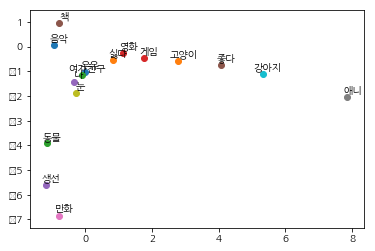

In [35]:
#######
# 신경망 모델 학습
#######
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for step in range(1, training_epoch+1):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        
        print('batch_inputs : ', batch_inputs, '  batch_labels  : ', batch_labels)
        _, loss_val = sess.run([train_op, loss], feed_dict={inputs: batch_inputs, labels: batch_labels})
        
        if step % 10 == 0:
            print("loss at step", step, " : ", loss_val)
            
        
        # matplot 으로 출력
        # 임베딩 벡터의 결과값을 저장
        # with 구문 안에서는 sess.run 대신 간단히 eval() 함수를 사용 가능
        trained_embeddings = embeddings.eval()
        
    
#######
# 임베딩된 word2vec 결과 확인
# 결과는 해당 단어들이 얼마나 다른 단어와 인접해 있는지를 보여줌
#######

for i , label in enumerate(word_list):
    x,y = trained_embeddings[i]
    plt.scatter(x,y)
    plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points', ha='center', va='bottom')
    
plt.show()